In [68]:
import pandas as pd
from IPython.display import display, Markdown
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np

## Data

In [2]:
nlexique = pd.read_csv('../data/nlexique.csv')
nlexique = nlexique[['lexeme', 'sg', 'gen']].rename(columns={'sg': 'phon'}).dropna().reset_index(drop=True)
nlexique

,lexeme,phon,gen
0,à-côté,akOte,m
1,à-coup,aku,m
2,à-peu-près,apØpʁɛ,m
3,à-pic,apik,m
4,à-plat,apla,m
...,...,...,...
30999,zurichois,zyʁikwa,m
31000,zydeco,zidəko,f
31001,zygoma,zigOma,m
31002,zygote,zigɔt,m


In [3]:
echantinom = pd.read_csv('../data/Echantinom-full-20210902.csv')
echantinom = echantinom[~echantinom['lemma'].isin(nlexique[nlexique['gen'] == 'b']['lexeme'])] #[['lemma', 'phon', 'gen']]
echantinom

,lemma,gen,phon,freq_lex_books,freq_lex_subtitles,freq_frcow,last_process_broad,last_process_narrow,prefix,compound,...,autonomous_base,base_stem_phon,sfx_allomorph,der_stem_phon,edit_distance,pattern,pattern_tf,pattern_rel_tf,base_der_sim,offset_sim
0,berlingue,m,bɛʁ.lɛ̃g,0.34,0.00,34,nonconcat,apocope,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,corton,m,kɔʁ.tɔ̃,0.27,0.03,398,suffix,suffix,0,0,...,True,kuʁ,ɔ̃,kɔʁt,2,_u_~_ɔ_tɔ̃,1,0.015625,0.222162783145905,0.158108526129264
2,dabuche,f,da.byʃ,0.54,0.00,3,suffix,suffix,0,0,...,True,UNKNOWN,yʃ,dab,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN
3,faf,m,faf,0.88,0.07,3422,nonconcat,apocope,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,gail,f,gaj,0.61,0.00,2471,simplex,native_simplex,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,palu,m,pa.ly,0.14,0.80,1431,nonconcat,apocope,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4996,talc,m,talk,1.49,1.40,2775,simplex,borrowing,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4997,sauvetage,m,sO.və.taʒ,3.72,8.32,60875,suffix,suffix,0,0,...,True,sOv,aʒ,sOvət,2,_~_ətaʒ,1,0.011494252873563,0.252674728631973,0.614848479997584
4998,plaid,m,plɛd,1.15,0.34,2889,simplex,borrowing,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
orth_preds_x10 = pd.read_csv('../results/echantinom_orth_preds_x10.csv')
orth_preds_x10.rename(columns={"Predicted Gender": "orth_pred", "True Gender": "true", "Form": 'lemma'}, inplace=True)
orth_preds_x10

,lemma,orth_pred,true,Class Probabilities,Set,Run
0,an,m,m,"[('n', {'f': 0.4085073173046112, 'm': 0.591492...",test,1
1,bi,m,m,"[('i', {'f': 0.16074861586093903, 'm': 0.83925...",test,1
2,as,m,m,"[('s', {'f': 0.2868475317955017, 'm': 0.713152...",test,1
3,té,m,m,"[('é', {'f': 0.3696044683456421, 'm': 0.630395...",test,1
4,pie,f,f,"[('e', {'f': 0.11107771843671799, 'm': 0.88892...",test,1
...,...,...,...,...,...,...
45315,approvisionnement,m,m,"[('t', {'f': 0.07809196412563324, 'm': 0.92190...",test,10
45316,sous-alimentation,f,f,"[('n', {'f': 0.38623788952827454, 'm': 0.61376...",test,10
45317,cul-de-basse-fosse,m,m,"[('e', {'f': 0.23680555820465088, 'm': 0.76319...",test,10
45318,marie-couche-toi-là,f,f,"[('à', {'f': 0.28149473667144775, 'm': 0.71850...",test,10


In [5]:
phon_preds_x10 = pd.read_csv('../results/echantinom_phon_preds_x10.csv')
phon_preds_x10.rename(columns={"Predicted Gender": "phon_pred", "True Gender": "true", "Form": 'phon'}, inplace=True)
phon_preds_x10

,phon,phon_pred,true,Class Probabilities,Set,Run
0,ɛ,m,f,"[('ɛ', {'f': 0.14882417023181915, 'm': 0.85117...",test,1
1,u,f,m,"[('u', {'f': 0.3157658278942108, 'm': 0.684234...",test,1
2,ɛ,m,m,"[('ɛ', {'f': 0.14882417023181915, 'm': 0.85117...",test,1
3,o,m,f,"[('o', {'f': 0.5670557618141174, 'm': 0.432944...",test,1
4,ba,m,m,"[('a', {'f': 0.39993923902511597, 'm': 0.60006...",test,1
...,...,...,...,...,...,...
45315,kɔ̃fidɑ̃sjalite,f,f,"[('e', {'f': 0.5326544642448425, 'm': 0.467345...",test,10
45316,ɛ̃kɔ̃patibilite,f,f,"[('e', {'f': 0.5326544642448425, 'm': 0.467345...",test,10
45317,suzalimɑ̃tasjɔ̃,f,f,"[('̃', {'f': 0.6368642449378967, 'm': 0.363135...",test,10
45318,tʁɑ̃splɑ̃tasjɔ̃,f,f,"[('̃', {'f': 0.6368642449378967, 'm': 0.363135...",test,10


## Run analyses

In [6]:
# Select the run with the most errors for each model

# For orthographic model
orth_errors = orth_preds_x10[orth_preds_x10['orth_pred'] != orth_preds_x10['true']]
orth_error_counts = orth_errors.groupby('Run').size()
orth_max_error_run = orth_error_counts.idxmax()
orth_errors_max = orth_errors[orth_errors['Run'] == orth_max_error_run]

# For phonetic model
phon_errors = phon_preds_x10[phon_preds_x10['phon_pred'] != phon_preds_x10['true']]
phon_error_counts = phon_errors.groupby('Run').size()
phon_max_error_run = phon_error_counts.idxmax()
phon_errors_max = phon_errors[phon_errors['Run'] == phon_max_error_run]


In [7]:
# Merge them based on their correspondance in nlexique
orth_errors_with_phon = orth_errors_max.merge(nlexique[['lexeme', 'phon']], 
                                              left_on='lemma', 
                                              right_on='lexeme', 
                                              how='inner')
orth_errors_with_phon

,lemma,orth_pred,true,Class Probabilities,Set,Run,lexeme,phon
0,mer,m,f,"[('r', {'f': 0.4957234859466553, 'm': 0.504276...",test,9,mer,mɛʁ
1,nef,m,f,"[('f', {'f': 0.3697991371154785, 'm': 0.630200...",test,9,nef,nɛf
2,bru,m,f,"[('u', {'f': 0.742748498916626, 'm': 0.2572515...",test,9,bru,bʁy
3,obi,m,f,"[('i', {'f': 0.220277801156044, 'm': 0.7797221...",test,9,obi,Obi
4,mob,m,f,"[('b', {'f': 0.12944133579730988, 'm': 0.87055...",test,9,mob,mɔb
...,...,...,...,...,...,...,...,...
436,chèvrefeuille,f,m,"[('e', {'f': 0.24833141267299652, 'm': 0.75166...",test,9,chèvrefeuille,ʃɛvʁəfœj
437,contre-courant,f,m,"[('t', {'f': 0.25025129318237305, 'm': 0.74974...",test,9,contre-courant,kɔ̃tʁəkuʁɑ̃
438,perpendiculaire,m,f,"[('e', {'f': 0.24833141267299652, 'm': 0.75166...",test,9,perpendiculaire,pɛʁpɑ̃dikylɛʁ
439,transatlantique,f,m,"[('e', {'f': 0.24833141267299652, 'm': 0.75166...",test,9,transatlantique,tʁɑ̃zatlɑ̃tik


In [8]:
# Find common errors based on the phonetic transcription and merge df
common_errors = orth_errors_with_phon[orth_errors_with_phon['phon'].isin(phon_errors_max['phon'])]
common_errors

,lemma,orth_pred,true,Class Probabilities,Set,Run,lexeme,phon
2,bru,m,f,"[('u', {'f': 0.742748498916626, 'm': 0.2572515...",test,9,bru,bʁy
3,obi,m,f,"[('i', {'f': 0.220277801156044, 'm': 0.7797221...",test,9,obi,Obi
4,mob,m,f,"[('b', {'f': 0.12944133579730988, 'm': 0.87055...",test,9,mob,mɔb
5,clé,m,f,"[('é', {'f': 0.42137300968170166, 'm': 0.57862...",test,9,clé,kle
6,glu,m,f,"[('u', {'f': 0.742748498916626, 'm': 0.2572515...",test,9,glu,gly
...,...,...,...,...,...,...,...,...
434,soutien-gorge,f,m,"[('e', {'f': 0.24833141267299652, 'm': 0.75166...",test,9,soutien-gorge,sutjɛ̃gɔʁʒ
435,archimandrite,f,m,"[('e', {'f': 0.24833141267299652, 'm': 0.75166...",test,9,archimandrite,aʁʃimɑ̃dʁit
438,perpendiculaire,m,f,"[('e', {'f': 0.24833141267299652, 'm': 0.75166...",test,9,perpendiculaire,pɛʁpɑ̃dikylɛʁ
439,transatlantique,f,m,"[('e', {'f': 0.24833141267299652, 'm': 0.75166...",test,9,transatlantique,tʁɑ̃zatlɑ̃tik


In [9]:
final_merged_errors = common_errors.merge(phon_errors_max, 
                                          on='phon', 
                                          suffixes=('_orth', '_phon'))

final_errors = final_merged_errors[['lemma', 'phon', 'orth_pred', 'phon_pred', 'true_phon']] \
                                    .rename(columns={'true_phon': 'true'})

final_errors

,lemma,phon,orth_pred,phon_pred,true
0,bru,bʁy,m,m,f
1,obi,Obi,m,m,f
2,mob,mɔb,m,m,f
3,clé,kle,m,m,f
4,glu,gly,m,m,f
...,...,...,...,...,...
237,soutien-gorge,sutjɛ̃gɔʁʒ,f,f,m
238,archimandrite,aʁʃimɑ̃dʁit,f,f,m
239,perpendiculaire,pɛʁpɑ̃dikylɛʁ,m,m,f
240,transatlantique,tʁɑ̃zatlɑ̃tik,f,f,m


In [10]:
# Checking for error mismatches
same_predictions = final_errors['orth_pred'] == final_errors['phon_pred']
match_count = same_predictions.sum()
mismatch_count = (~same_predictions).sum()
total_count = len(final_errors)

print(f"Total number of errors: {total_count}")
print(f"Number of matching predictions: {match_count}")
print(f"Number of mismatching predictions: {mismatch_count}")
print(f"Percentage of matching predictions: {match_count / total_count * 100:.2f}%")
final_errors[~same_predictions]

Total number of errors: 242
Number of matching predictions: 241
Number of mismatching predictions: 1
Percentage of matching predictions: 99.59%


,lemma,phon,orth_pred,phon_pred,true
27,part,paʁ,m,f,m


In [11]:
# Merge error dataframe with echantinom
merged_errors_echantinom = final_errors.merge(echantinom, on='lemma', how='left')
merged_errors_echantinom = merged_errors_echantinom.drop(["phon_pred", "gen", "phon_y"], axis=1).rename(columns={"orth_pred": "pred", "phon_x": "phon"})
cols_to_remove = [col for col in merged_errors_echantinom.columns if merged_errors_echantinom[col].isna().all()]
merged_errors_echantinom.drop(columns=cols_to_remove, inplace=True)
print(f"Removed columns with only NaN values: {cols_to_remove}")
merged_errors_echantinom

Removed columns with only NaN values: []


,lemma,phon,pred,true,freq_lex_books,freq_lex_subtitles,freq_frcow,last_process_broad,last_process_narrow,prefix,...,autonomous_base,base_stem_phon,sfx_allomorph,der_stem_phon,edit_distance,pattern,pattern_tf,pattern_rel_tf,base_der_sim,offset_sim
0,bru,bʁy,m,f,3.24,1.45,3673,simplex,native_simplex,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,obi,Obi,m,f,0.07,0.30,1606,simplex,borrowing,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,mob,mɔb,m,f,0.68,0.93,10736,nonconcat,apocope,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,clé,kle,m,f,48.58,118.13,441735,simplex,native_simplex,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,glu,gly,m,f,2.57,0.56,1648,simplex,native_simplex,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,soutien-gorge,sutjɛ̃gɔʁʒ,f,m,8.65,5.86,10755,polylexical,native_compound,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
238,archimandrite,aʁʃimɑ̃dʁit,f,m,0.61,0.00,472,simplex,native_simplex,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
239,perpendiculaire,pɛʁpɑ̃dikylɛʁ,m,f,0.74,0.04,0,conversion,conversion-A,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
240,transatlantique,tʁɑ̃zatlɑ̃tik,f,m,2.50,0.19,1,conversion,conversion-A,trans,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
merged_errors_echantinom['pred'].value_counts()         # There are more m predicted as f than vice versa

f    135
m    107
Name: pred, dtype: int64

In [13]:
merged_errors_echantinom['last_process_broad'].value_counts()

simplex        159
suffix          27
nonconcat       17
conversion      17
polylexical     15
prefix           7
Name: last_process_broad, dtype: int64

In [14]:
merged_errors_echantinom['suffix'].unique() 
merged_errors_echantinom['suffix'].value_counts()

0       209
eurF     11
aire      2
ôse       2
ureM      2
ule       2
aine      2
ose       1
ique      1
cule      1
ite       1
uche      1
iche      1
ia        1
eurM      1
if        1
aneM      1
in        1
el        1
Name: suffix, dtype: int64

In [48]:
merged_errors_echantinom['last_process_narrow'].value_counts() # We have 21 borrowings, which are:
merged_errors_echantinom[merged_errors_echantinom['last_process_narrow'] == 'borrowing']['lemma'].tolist()

['obi',
 'kipa',
 'city',
 'cola',
 'miss',
 'lama',
 'sauna',
 'squaw',
 'drive',
 'vodka',
 'razzia',
 'vahiné',
 'mantra',
 'alcade',
 'pin-up',
 'maharani',
 'start-up',
 'pipe-line',
 'superstar',
 'desiderata',
 'strip-tease']

### Diving into the simplicia

In [23]:
# Proportions per category
counts = merged_errors_echantinom['last_process_broad'].value_counts()
proportions = counts / counts.sum()

for category, proportion in proportions.items():
    print(f"{category}: {proportion:.2%}")                  # 65% of the simplicia raise issues in the prediction of the gender

simplex: 65.70%
suffix: 11.16%
nonconcat: 7.02%
conversion: 7.02%
polylexical: 6.20%
prefix: 2.89%


In [80]:
# Look for most common endings (although not suffixes)
simplex_data  = merged_errors_echantinom[merged_errors_echantinom['last_process_broad'] == "simplex"][["lemma", "true"]]
lemma_gender = dict(zip(simplex_data['lemma'], simplex_data['true']))
endings = defaultdict(lambda: defaultdict(list))
for lemma, gender in lemma_gender.items():
    endings[lemma[-1]][gender].append(lemma)        # Group by last letter
    if len(lemma) > 1:
        endings[lemma[-2:]][gender].append(lemma)   # Group by last two letters 
    if len(lemma) > 2:
        endings[lemma[-3:]][gender].append(lemma)   # Group by last three letters

print("Most common endings:")
# Note: we print here the true genders
for ending, genders in sorted(endings.items(), key=lambda x: sum(len(v) for v in x[1].values()), reverse=True)[:20]:
    total = sum(len(words) for words in genders.values())
    print(f"\n-{ending}: {total} words")
    for gender, words in genders.items():
        percentage = len(words) / total * 100
        print(f"  {gender}: {len(words)} words ({percentage:.1f}%)")
        words_to_print = words[:20]
        print(f"    {', '.join(words_to_print)}", end="")
        if len(words) > 20:
            print(f" ... and {len(words) - 20} more")
        else:
            print() 


Most common endings:

-e: 114 words
  f: 40 words (35.1%)
    cage, toge, rage, puce, acre, gaze, nage, robe, hâte, loge, icône, trame, hydre, spire, bugle, brume, bible, piste, chape, spore ... and 20 more
  m: 74 words (64.9%)
    rêve, mime, vice, dine, vote, jute, pagne, fifre, ongle, renne, cadre, torse, blase, morse, baile, azote, crane, cotre, nonce, culte ... and 54 more

-re: 27 words
  f: 6 words (22.2%)
    acre, hydre, spire, spore, fenêtre, vertèbre
  m: 21 words (77.8%)
    fifre, cadre, cotre, frère, lierre, congre, poivre, cigare, pampre, marbre, boutre, mercure, salaire, gruyère, murmure, camphre, matamore, grimoire, genièvre, cimeterre ... and 1 more

-te: 14 words
  f: 6 words (42.9%)
    hâte, piste, crypte, riposte, imposte, langouste
  m: 8 words (57.1%)
    vote, jute, azote, culte, diabète, tumulte, quarante, archimandrite

-a: 12 words
  f: 3 words (25.0%)
    kipa, vodka, razzia
  m: 9 words (75.0%)
    cola, lama, sauna, delta, mantra, dahlia, placenta, desid

In [81]:
# Calculate entropy to measure how uncertain the ending's prediction is
def calculate_entropy(gender_counts):
    total = sum(gender_counts.values())
    probabilities = [count/total for count in gender_counts.values()]
    return -sum(p * np.log2(p) for p in probabilities if p > 0)

ending_data = []
for ending, genders in endings.items():
    total = sum(len(words) for words in genders.values())
    if total >= 5:  # Only consider endings with at least 5 words
        gender_counts = {gender: len(words) for gender, words in genders.items()}
        entropy = calculate_entropy(gender_counts)
        ending_data.append((ending, gender_counts, entropy, total))

# Sort endings by entropy (most problematic first) and total count
# problematic = endings that don't clearly indicate one gender or the other
ending_data.sort(key=lambda x: (x[2], x[3]), reverse=True)        
ending_data

[('le', {'m': 5, 'f': 5}, 1.0, 10),
 ('ue', {'f': 3, 'm': 3}, 1.0, 6),
 ('te', {'f': 6, 'm': 8}, 0.9852281360342515, 14),
 ('e', {'f': 40, 'm': 74}, 0.9348490242345944, 114),
 ('me', {'m': 2, 'f': 4}, 0.9182958340544896, 6),
 ('ce', {'f': 2, 'm': 5}, 0.863120568566631, 7),
 ('a', {'f': 3, 'm': 9}, 0.8112781244591328, 12),
 ('n', {'f': 2, 'm': 6}, 0.8112781244591328, 8),
 ('on', {'f': 2, 'm': 6}, 0.8112781244591328, 8),
 ('re', {'f': 6, 'm': 21}, 0.7642045065086203, 27),
 ('ne', {'m': 10, 'f': 2}, 0.6500224216483541, 12),
 ('ge', {'f': 5, 'm': 1}, 0.6500224216483541, 6),
 ('ve', {'m': 5, 'f': 1}, 0.6500224216483541, 6),
 ('se', {'m': 8}, -0.0, 8),
 ('r', {'f': 6}, -0.0, 6),
 ('u', {'f': 5}, -0.0, 5),
 ('ur', {'f': 5}, -0.0, 5),
 ('ion', {'m': 5}, -0.0, 5)]

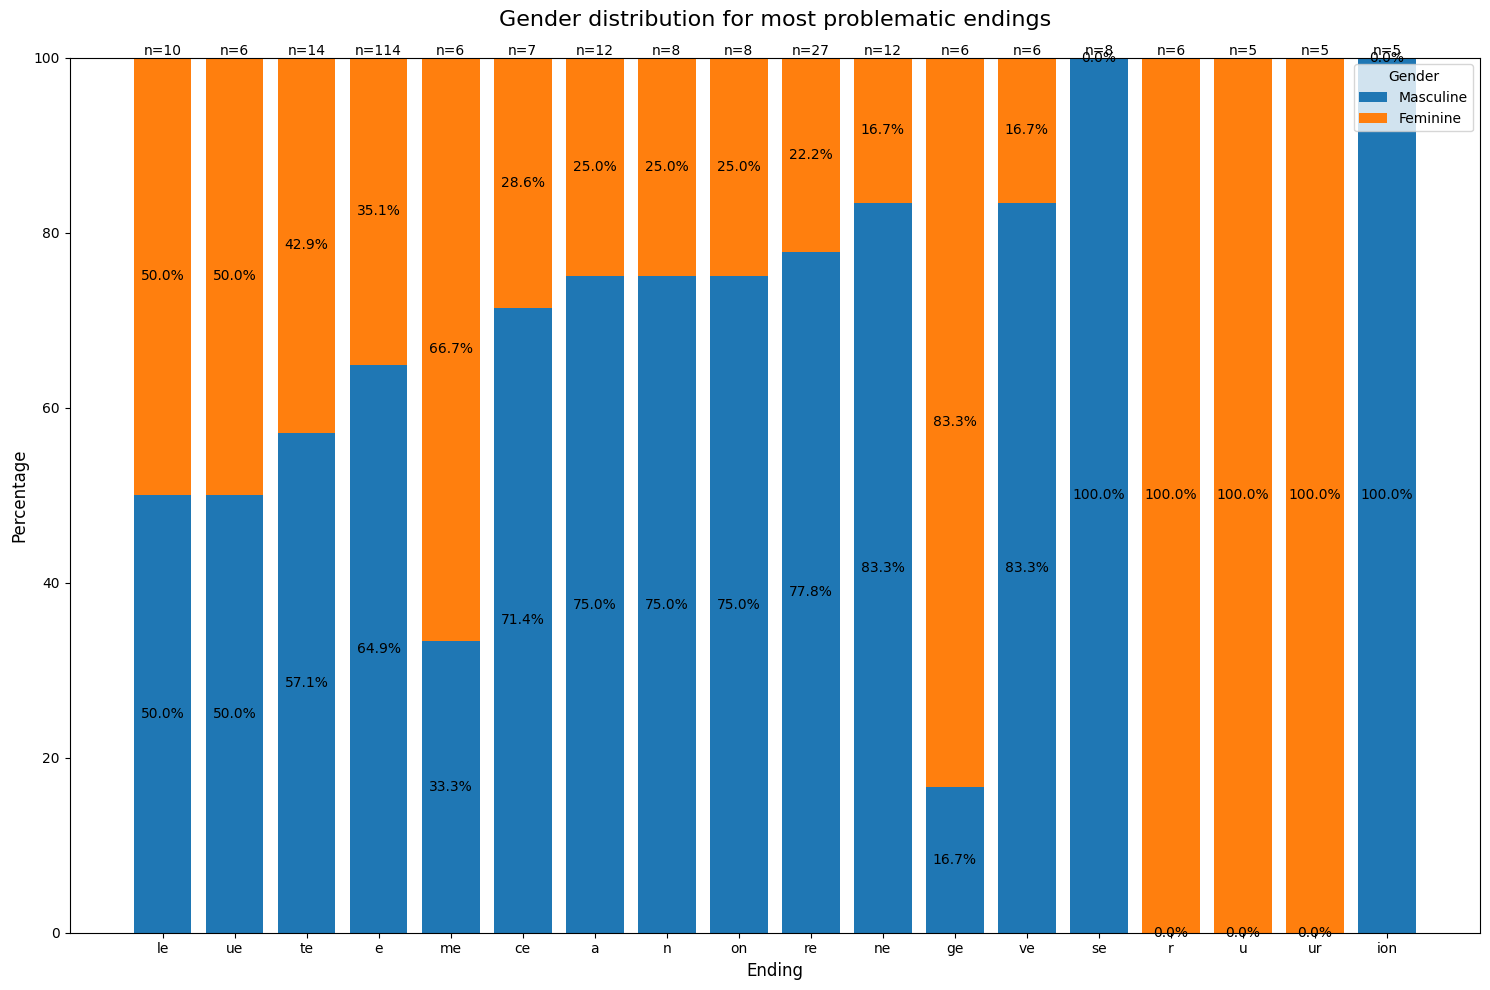

In [78]:
# Plot
top_endings = ending_data[:20]
endings = [data[0] for data in top_endings]
m_counts = [data[1].get('m', 0) for data in top_endings]
f_counts = [data[1].get('f', 0) for data in top_endings]

# Calculate percentages
totals = [m + f for m, f in zip(m_counts, f_counts)]
m_percentages = [m/total*100 for m, total in zip(m_counts, totals)]
f_percentages = [f/total*100 for f, total in zip(f_counts, totals)]

# Create the stacked bar plot
fig, ax = plt.subplots(figsize=(15, 10))
ax.bar(endings, m_percentages, label='Masculine')
ax.bar(endings, f_percentages, bottom=m_percentages, label='Feminine')
ax.set_title('Gender distribution for most problematic endings\n', fontsize=16)
ax.set_xlabel('Ending', fontsize=12)
ax.set_ylabel('Percentage', fontsize=12)
ax.legend(title='Gender')

# Add percentage labels
for i, (m, f) in enumerate(zip(m_percentages, f_percentages)):
    ax.text(i, m/2, f'{m:.1f}%', ha='center', va='center')
    ax.text(i, m + f/2, f'{f:.1f}%', ha='center', va='center')

# Add total count on top of each bar
for i, total in enumerate(totals):
    ax.text(i, 100, f'n={total}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [40]:
# Analyze gender distribution by word length
length_gender = defaultdict(lambda: defaultdict(int))
for lemma, gender in lemma_gender.items():
    length_gender[len(lemma)][gender] += 1

print("\nWord length and gender distribution:")
for length in sorted(length_gender.keys()):
    total = sum(length_gender[length].values())
    print(f"\n{length} letters: {total} words")
    for gender, count in length_gender[length].items():
        percentage = count / total * 100
        print(f"  {gender}: {count} words ({percentage:.1f}%)")


Word length and gender distribution:

3 letters: 5 words
  f: 5 words (100.0%)

4 letters: 24 words
  f: 15 words (62.5%)
  m: 9 words (37.5%)

5 letters: 38 words
  m: 22 words (57.9%)
  f: 16 words (42.1%)

6 letters: 33 words
  f: 13 words (39.4%)
  m: 20 words (60.6%)

7 letters: 25 words
  m: 16 words (64.0%)
  f: 9 words (36.0%)

8 letters: 18 words
  m: 12 words (66.7%)
  f: 6 words (33.3%)

9 letters: 9 words
  m: 5 words (55.6%)
  f: 4 words (44.4%)

10 letters: 5 words
  m: 4 words (80.0%)
  f: 1 words (20.0%)

11 letters: 1 words
  m: 1 words (100.0%)

13 letters: 1 words
  m: 1 words (100.0%)


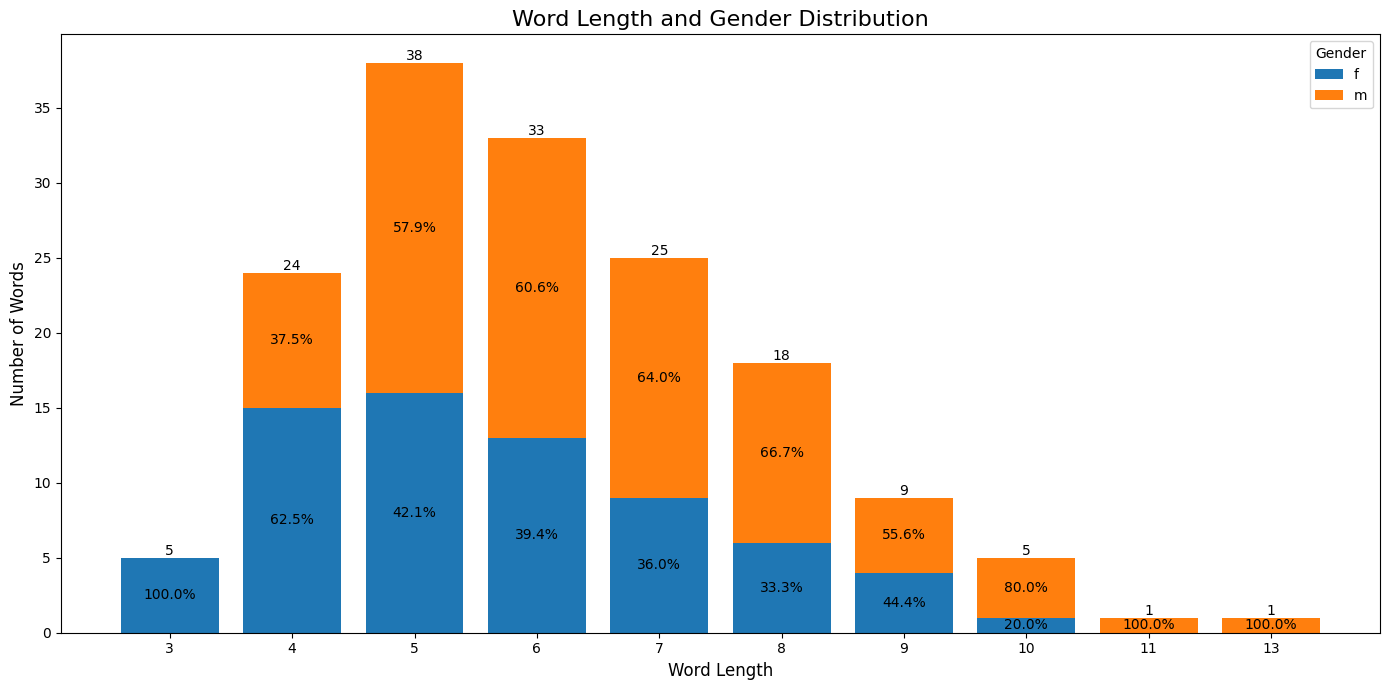

In [86]:
# Plot
lengths = sorted(length_gender.keys())
genders = list(set(gender for length_dict in length_gender.values() for gender in length_dict.keys()))
data = {gender: [length_gender[length].get(gender, 0) for length in lengths] for gender in genders}

# Create the stacked bar plot
fig, ax = plt.subplots(figsize=(14, 7))  
bottom = np.zeros(len(lengths))
for gender in genders:
    ax.bar(range(len(lengths)), data[gender], bottom=bottom, label=gender)
    bottom += data[gender]

ax.set_title('Word Length and Gender Distribution', fontsize=16)
ax.set_xlabel('Word Length', fontsize=12)
ax.set_ylabel('Number of Words', fontsize=12)
ax.legend(title='Gender')

# Set x-ticks and labels
ax.set_xticks(range(len(lengths)))
ax.set_xticklabels(lengths)

# Add value labels on the bars
for i, length in enumerate(lengths):
    total = sum(data[gender][i] for gender in genders)
    ax.text(i, total, str(total), ha='center', va='bottom')

# Add percentage labels
for i, length in enumerate(lengths):
    total = sum(data[gender][i] for gender in genders)
    bottom = 0
    for gender in genders:
        count = data[gender][i]
        if count > 0:
            percentage = count / total * 100
            ax.text(i, bottom + count/2, f'{percentage:.1f}%', 
                    ha='center', va='center')
        bottom += count

plt.tight_layout()
plt.show()


## Orth/phon agreement vs. disagreement

In [6]:
orth_incorrect = orth_preds_x10[orth_preds_x10.orth_pred != orth_preds_x10.true]
orth_incorrect

,lemma,orth_pred,true,Class Probabilities,Set,Run
42,foi,m,f,"[('i', {'f': 0.16074861586093903, 'm': 0.83925...",test,1
43,ire,m,f,"[('e', {'f': 0.11107771843671799, 'm': 0.88892...",test,1
44,nef,m,f,"[('f', {'f': 0.43117114901542664, 'm': 0.56882...",test,1
48,ive,m,f,"[('e', {'f': 0.11107771843671799, 'm': 0.88892...",test,1
58,glu,m,f,"[('u', {'f': 0.37645187973976135, 'm': 0.62354...",test,1
...,...,...,...,...,...,...
45202,franc-maçonne,m,f,"[('e', {'f': 0.23680555820465088, 'm': 0.76319...",test,10
45241,monte-en-l'air,f,m,"[('r', {'f': 0.29656296968460083, 'm': 0.70343...",test,10
45269,contre-attaque,m,f,"[('e', {'f': 0.23680555820465088, 'm': 0.76319...",test,10
45288,transatlantique,f,m,"[('e', {'f': 0.23680555820465088, 'm': 0.76319...",test,10


In [7]:
orth_correct = orth_preds_x10[orth_preds_x10.orth_pred == orth_preds_x10.true]
orth_correct['phon_pred'] = phon_preds_x10.phon_pred 
pd.crosstab(orth_correct.orth_pred, orth_correct.phon_pred)

C:\Users\ninan\AppData\Local\Temp\ipykernel_5344\2831827995.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orth_correct['phon_pred'] = phon_preds_x10.phon_pred


phon_pred,f,m
orth_pred,,
f,5328,9151
m,9395,17216


### Phon/orth agreement vs. disagreement

In [8]:
phon_incorrect = phon_preds_x10[phon_preds_x10.phon_pred != phon_preds_x10['true']]
phon_incorrect

,lemma,phon_pred,true,Class Probabilities,Set,Run
0,ɛ,m,f,"[('ɛ', {'f': 0.14882417023181915, 'm': 0.85117...",test,1
1,u,f,m,"[('u', {'f': 0.3157658278942108, 'm': 0.684234...",test,1
3,o,m,f,"[('o', {'f': 0.5670557618141174, 'm': 0.432944...",test,1
5,ʁu,m,f,"[('u', {'f': 0.3157658278942108, 'm': 0.684234...",test,1
7,œj,f,m,"[('j', {'f': 0.06026039645075798, 'm': 0.93973...",test,1
...,...,...,...,...,...,...
45277,tʁɑ̃zatlɑ̃tik,f,m,"[('k', {'f': 0.41414210200309753, 'm': 0.58585...",test,10
45284,kɔ̃tʁəlamɔ̃tʁ,f,m,"[('ʁ', {'f': 0.28374531865119934, 'm': 0.71625...",test,10
45286,pɛʁpɑ̃dikylɛʁ,m,f,"[('ʁ', {'f': 0.28374531865119934, 'm': 0.71625...",test,10
45297,mOdysOpEʁɑ̃di,f,m,"[('i', {'f': 0.3824596405029297, 'm': 0.617540...",test,10


In [9]:
phon_correct = phon_preds_x10[phon_preds_x10.phon_pred == phon_preds_x10.true]
phon_correct['orth_pred'] = orth_preds_x10.orth_pred 
pd.crosstab(phon_correct.phon_pred, phon_correct.orth_pred)


C:\Users\ninan\AppData\Local\Temp\ipykernel_5344\2820111615.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phon_correct['orth_pred'] = orth_preds_x10.orth_pred


orth_pred,f,m
phon_pred,,
f,4487,7383
m,9014,15440


### Orth/phon agreement vs. disagreement

In [10]:
orth_incorrect = orth_preds_x10[orth_preds_x10.orth_pred != orth_preds_x10['true']]
orth_incorrect

,lemma,orth_pred,true,Class Probabilities,Set,Run
42,foi,m,f,"[('i', {'f': 0.16074861586093903, 'm': 0.83925...",test,1
43,ire,m,f,"[('e', {'f': 0.11107771843671799, 'm': 0.88892...",test,1
44,nef,m,f,"[('f', {'f': 0.43117114901542664, 'm': 0.56882...",test,1
48,ive,m,f,"[('e', {'f': 0.11107771843671799, 'm': 0.88892...",test,1
58,glu,m,f,"[('u', {'f': 0.37645187973976135, 'm': 0.62354...",test,1
...,...,...,...,...,...,...
45202,franc-maçonne,m,f,"[('e', {'f': 0.23680555820465088, 'm': 0.76319...",test,10
45241,monte-en-l'air,f,m,"[('r', {'f': 0.29656296968460083, 'm': 0.70343...",test,10
45269,contre-attaque,m,f,"[('e', {'f': 0.23680555820465088, 'm': 0.76319...",test,10
45288,transatlantique,f,m,"[('e', {'f': 0.23680555820465088, 'm': 0.76319...",test,10


In [11]:
orth_correct = orth_preds_x10[orth_preds_x10.orth_pred == orth_preds_x10.true]
orth_correct['phon_pred'] = phon_preds_x10.phon_pred 
pd.crosstab(orth_correct.orth_pred, orth_correct.phon_pred)


C:\Users\ninan\AppData\Local\Temp\ipykernel_5344\2930785969.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orth_correct['phon_pred'] = phon_preds_x10.phon_pred


phon_pred,f,m
orth_pred,,
f,5328,9151
m,9395,17216
